### All days of the challange:

* [Day 1: Handling missing values](https://www.kaggle.com/rtatman/data-cleaning-challenge-handling-missing-values)
* [Day 2: Scaling and normalization](https://www.kaggle.com/rtatman/data-cleaning-challenge-scale-and-normalize-data)
* [Day 3: Parsing dates](https://www.kaggle.com/rtatman/data-cleaning-challenge-parsing-dates/)
* [Day 4: Character encodings](https://www.kaggle.com/rtatman/data-cleaning-challenge-character-encodings/)
* [Day 5: Inconsistent Data Entry](https://www.kaggle.com/rtatman/data-cleaning-challenge-inconsistent-data-entry/)
___
Welcome to day 3 of the 5-Day Data Challenge! Today, we're going to work with dates. To get started, click the blue "Fork Notebook" button in the upper, right hand corner. This will create a private copy of this notebook that you can edit and play with. Once you're finished with the exercises, you can choose to make your notebook public to share with others. :)

> **Your turn!** As we work through this notebook, you'll see some notebook cells (a block of either code or text) that has "Your Turn!" written in it. These are exercises for you to do to help cement your understanding of the concepts we're talking about. Once you've written the code to answer a specific question, you can run the code by clicking inside the cell (box with code in it) with the code you want to run and then hit CTRL + ENTER (CMD + ENTER on a Mac). You can also click in a cell and then click on the right "play" arrow to the left of the code. If you want to run all the code in your notebook, you can use the double, "fast forward" arrows at the bottom of the notebook editor.

Here's what we're going to do today:

* [Get our environment set up](#Get-our-environment-set-up)
* [Check the data type of our date column](#Check-the-data-type-of-our-date-column)
* [Convert our date columns to datetime](#Convert-our-date-columns-to-datetime)
* [Select just the day of the month from our column](#Select-just-the-day-of-the-month-from-our-column)
* [Plot the day of the month to check the date parsing](#Plot-the-day-of-the-month-to-the-date-parsing)

Let's get started!

# Get our environment set up
________

The first thing we'll need to do is load in the libraries and datasets we'll be using. For today, we'll be working with two datasets: one containing information on earthquakes that occured between 1965 and 2016, and another that contains information on landslides that occured between 2007 and 2016.

> **Important!** Make sure you run this cell yourself or the rest of your code won't work!

In [19]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
earthquakes = pd.read_csv('/Users/william/data/datasets/earthquake-database/database.csv')
landslides = pd.read_csv('/Users/william/data/datasets/landslide-events/catalog.csv')
volcanos = pd.read_csv('/Users/william/data/datasets/volcanic-eruptions/database.csv')

# set seed for reproducibility
np.random.seed(0)

Now we're ready to look at some dates! (If you like, you can take this opportunity to take a look at some of the data.)

# Check the data type of our date column
___

For this part of the challenge, I'll be working with the `date` column from the `landslides` dataframe. The very first thing I'm going to do is take a peek at the first few rows to make sure it actually looks like it contains dates.

In [20]:
# print the first few rows of the date column
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


Yep, those are dates! But just because I, a human, can tell that these are dates doesn't mean that Python knows that they're dates. Notice that the at the bottom of the output of `head()`, you can see that it says that the data type of this  column is "object". 

> Pandas uses the "object" dtype for storing various types of data types, but most often when you see a column with the dtype "object" it will have strings in it. 

If you check the pandas dtype documentation [here](http://pandas.pydata.org/pandas-docs/stable/basics.html#dtypes), you'll notice that there's also a specific `datetime64` dtypes. Because the dtype of our column is `object` rather than `datetime64`, we can tell that Python doesn't know that this column contains dates.

We can also look at just the dtype of your column without printing the first few rows if we like:

In [21]:
# check the data type of our date column
landslides['date'].dtype

dtype('O')

You may have to check the [numpy documentation](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.dtype.kind.html#numpy.dtype.kind) to match the letter code to the dtype of the object. "O" is the code for "object", so we can see that these two methods give us the same information.

In [22]:
# Your turn! Check the data type of the Date column in the earthquakes dataframe
# (note the capital 'D' in date!)
print(earthquakes['Date'].head())
print(earthquakes['Date'].tail())
earthquakes['Date'].dtype

0    01/02/1965
1    01/04/1965
2    01/05/1965
3    01/08/1965
4    01/09/1965
Name: Date, dtype: object
23407    12/28/2016
23408    12/28/2016
23409    12/28/2016
23410    12/29/2016
23411    12/30/2016
Name: Date, dtype: object


dtype('O')

# Convert our date columns to datetime
___

Now that we know that our date column isn't being recognized as a date, it's time to convert it so that it *is* recognized as a date. This is called "parsing dates" because we're taking in a string and identifying its component parts.

We can pandas what the format of our dates are with a guide called as ["strftime directive", which you can find more information on at this link](http://strftime.org/). The basic idea is that you need to point out which parts of the date are where and what punctuation is between them. There are [lots of possible parts of a date](http://strftime.org/), but the most common are `%d` for day, `%m` for month, `%y` for a two-digit year and `%Y` for a four digit year.

Some examples:

 * 1/17/07 has the format "%m/%d/%y"
 * 17-1-2007 has the format "%d-%m-%Y"
 
 Looking back up at the head of the `date` column in the landslides dataset, we can see that it's in the format "month/day/two-digit year", so we can use the same syntax as the first example to parse in our dates: 

In [23]:
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format = "%m/%d/%y")

Now when I check the first few rows of the new column, I can see that the dtype is `datetime64`. I can also see that my dates have been slightly rearranged so that they fit the default order datetime objects (year-month-day).

In [24]:
# print the first few rows
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

Now that our dates are parsed correctly, we can interact with them in useful ways.

___
* **What if I run into an error with multiple date formats?** While we're specifying the date format here, sometimes you'll run into an error when there are multiple date formats in a single column. If that happens, you have have pandas try to infer what the right date format should be. You can do that like so:

`landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)`

* **Why don't you always use `infer_datetime_format = True?`** There are two big reasons not to always have pandas guess the time format. The first is that pandas won't always been able to figure out the correct date format, especially if someone has gotten creative with data entry. The second is that it's much slower than specifying the exact format of the dates.
____

In [25]:
# Your turn! Create a new column, date_parsed, in the earthquakes
# dataset that has correctly parsed dates in it. (Don't forget to 
# double-check that the dtype is correct!)
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format = "%m/%d/%Y")
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], infer_datetime_format=True)

ValueError: time data '1975-02-23T02:58:41.000Z' does not match format '%m/%d/%Y' (match)

In [26]:
earthquakes.loc[earthquakes["Date"].str.split("/").apply(lambda x:len(x) != 3), "Date"]

3378     1975-02-23T02:58:41.000Z
7512     1985-04-28T02:53:41.530Z
20650    2011-03-13T02:23:34.520Z
Name: Date, dtype: object

In [27]:
cnt = 0
numrec = earthquakes.shape[0]
for i in range(0,numrec):
    if len(earthquakes['Date'].iloc[i]) > 10: #Corrected ">" from cut and paste transpose (3/28/2018-14:28 PDT)
        year = earthquakes['Date'].iloc[i][:4]
        month = earthquakes['Date'].iloc[i][5:7]
        date = earthquakes['Date'].iloc[i][8:10]
        newdate = month + '/' + date + '/' + year
        earthquakes['Date'].iloc[i] = newdate
        #print (tmpdf['Date'].iloc[i] + " " + year + month + date + " " + newdate)
        cnt += 1
print ("Corrected " + str(cnt) + " Records")

Corrected 3 Records


In [28]:
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format = "%m/%d/%Y")

In [29]:
earthquakes['date_parsed'].head()

0   1965-01-02
1   1965-01-04
2   1965-01-05
3   1965-01-08
4   1965-01-09
Name: date_parsed, dtype: datetime64[ns]

# Select just the day of the month from our column
___

"Ok, Rachael," you may be saying at this point, "This messing around with data types is fine, I guess, but what's the *point*?" To answer your question, let's try to get information on the day of the month that a landslide occured on from the original "date" column, which has an "object" dtype: 

In [49]:
# try to get the day of the month from the date column
day_of_month_landslides = landslides['date'].dt.day

AttributeError: Can only use .dt accessor with datetimelike values

We got an error! The important part to look at here is the part at the very end that says `AttributeError: Can only use .dt accessor with datetimelike values`. We're getting this error because the dt.day() function doesn't know how to deal with a column with the dtype "object". Even though our dataframe has dates in it, because they haven't been parsed we can't interact with them in a useful way.

Luckily, we have a column that we parsed earlier , and that lets us get the day of the month out no problem:

In [47]:
# get the day of the month from the date_parsed column
day_of_month_landslides = landslides['date_parsed'].dt.day

In [48]:
day_of_month_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

In [43]:
# Your turn! get the day of the month from the date_parsed column
day_of_month_earthquake = earthquakes['date_parsed'].dt.day

In [44]:
day_of_month_earthquake.head()

0    2
1    4
2    5
3    8
4    9
Name: date_parsed, dtype: int64

# Plot the day of the month to check the date parsing
___

One of the biggest dangers in parsing dates is mixing up the months and days. The to_datetime() function does have very helpful error messages, but it doesn't hurt to double-check that the days of the month we've extracted make sense. 

To do this, let's plot a histogram of the days of the month. We expect it to have values between 1 and 31 and, since there's no reason to suppose the landslides are more common on some days of the month than others, a relatively even distribution. (With a dip on 31 because not all months have 31 days.) Let's see if that's the case:

/Users/william/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


/Users/william/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


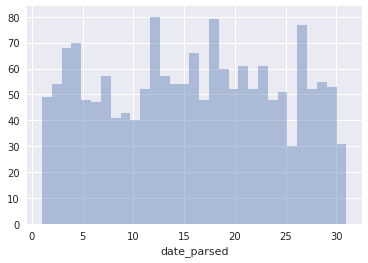

In [39]:
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
sns.distplot(day_of_month_landslides, kde=False, bins=31)

Yep, it looks like we did parse our dates correctly & this graph makes good sense to me. Why don't you take a turn checking the dates you parsed earlier?

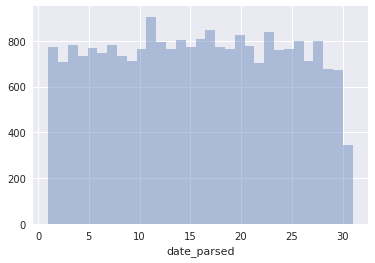

In [45]:
# Your turn! Plot the days of the month from your
# earthquake dataset and make sure they make sense.

# remove na's
day_of_month_earthquake = day_of_month_earthquake.dropna()

# plot the day of the month
sns.distplot(day_of_month_earthquake, kde=False, bins=31)

And that's it for today! If you have any questions, be sure to post them in the comments below or [on the forums](https://www.kaggle.com/questions-and-answers). 

Remember that your notebook is private by default, and in order to share it with other people or ask for help with it, you'll need to make it public. First, you'll need to save a version of your notebook that shows your current work by hitting the "Commit & Run" button. (Your work is saved automatically, but versioning your work lets you go back and look at what it was like at the point you saved it. It also lets you share a nice compiled notebook instead of just the raw code.) Then, once your notebook is finished running, you can go to the Settings tab in the panel to the left (you may have to expand it by hitting the [<] button next to the "Commit & Run" button) and setting the "Visibility" dropdown to "Public".

# More practice!
___

If you're interested in graphing time series, [check out this Learn tutorial](https://www.kaggle.com/residentmario/time-series-plotting-optional).

You can also look into passing columns that you know have dates in them  the `parse_dates` argument in `read_csv`. (The documention [is here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).) Do note that this method can be very slow, but depending on your needs it may sometimes be handy to use.

For an extra challenge, you can try try parsing the column `Last Known Eruption` from the `volcanos` dataframe. This column contains a mixture of text ("Unknown") and years both before the common era (BCE, also known as BC) and in the common era (CE, also known as AD).

In [46]:
volcanos['Last Known Eruption'].sample(5)

764     Unknown
1069    1996 CE
34      1855 CE
489     2016 CE
9       1302 CE
Name: Last Known Eruption, dtype: object

In [50]:
volcanos['Last Known Eruption'] = volcanos['Last Known Eruption'].apply(lambda x: np.nan if x == 'Unknown' else x)
volcanos['Last Known Eruption Year'] = volcanos['Last Known Eruption'].apply(lambda x: np.nan if pd.isnull(x) else str(x).split(' ')[0])
volcanos['Last Known Eruption BCE/CE'] = volcanos['Last Known Eruption'].apply(lambda x: 'BCE' if str(x)[-3] == 'B' else ('CE' if str(x)[-3] == ' ' else np.nan))

In [51]:
volcanos.head()

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting,Last Known Eruption Year,Last Known Eruption BCE/CE
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km),8300,BCE
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.97,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km),4040,BCE
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,NaN,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km),NaN,NaN
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km),3600,BCE
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.87,500,No Data,Subduction Zone / Continental Crust (>25 km),1282,CE


In [52]:
def years_from_2018(row):
    if pd.isnull(row['Last Known Eruption Year']):
        return np.nan
    elif row['Last Known Eruption BCE/CE'] == 'CE':
        return 2018 - int(row['Last Known Eruption Year'])
    else:
        return 2018 + int(row['Last Known Eruption Year'])

In [53]:
volcanos['Years from 2018'] = volcanos.apply(years_from_2018, axis = 1)

In [54]:
volcanos.head()

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting,Last Known Eruption Year,Last Known Eruption BCE/CE,Years from 2018
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km),8300,BCE,10318.0
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.97,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km),4040,BCE,6058.0
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,NaN,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km),NaN,NaN,NaN
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km),3600,BCE,5618.0
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.87,500,No Data,Subduction Zone / Continental Crust (>25 km),1282,CE,736.0


In [55]:
volcanos.describe()

,Number,Latitude,Longitude,Elevation (Meters),Years from 2018
count,1508.000000,1508.000000,1508.000000,1508.000000,871.000000
mean,296656.110743,14.083156,23.391469,1683.357427,1241.021814
std,48861.852600,31.871107,113.656588,1571.102885,2322.595315
min,210010.000000,-78.500000,-179.970000,-4200.000000,2.000000
25%,261157.500000,-7.068750,-78.274250,687.250000,21.000000
50%,300015.000000,13.861500,38.390000,1464.000000,112.000000
75%,342123.250000,41.748750,138.578000,2352.250000,1168.000000
max,390847.000000,85.608000,179.580000,6879.000000,12468.000000
